# BANK MARKETING PROJECT

The following project focus on the analysis of a dataset 'Bank Marketing' which contains data about customers and aims to get useful insights from the data and predict if a new customer will accept a deposit offer or not.<br>

The project is structured as follows:<br>

-Data Cleaning + Feature Engineering<br>
-Exploratory Data Analysis<br>
-Data preparation for ML algorithms (encoding, balancing)<br>
-ML algorithms training<br>
-Results Summary<br>

In [75]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bank-marketing-dataset/bank.csv


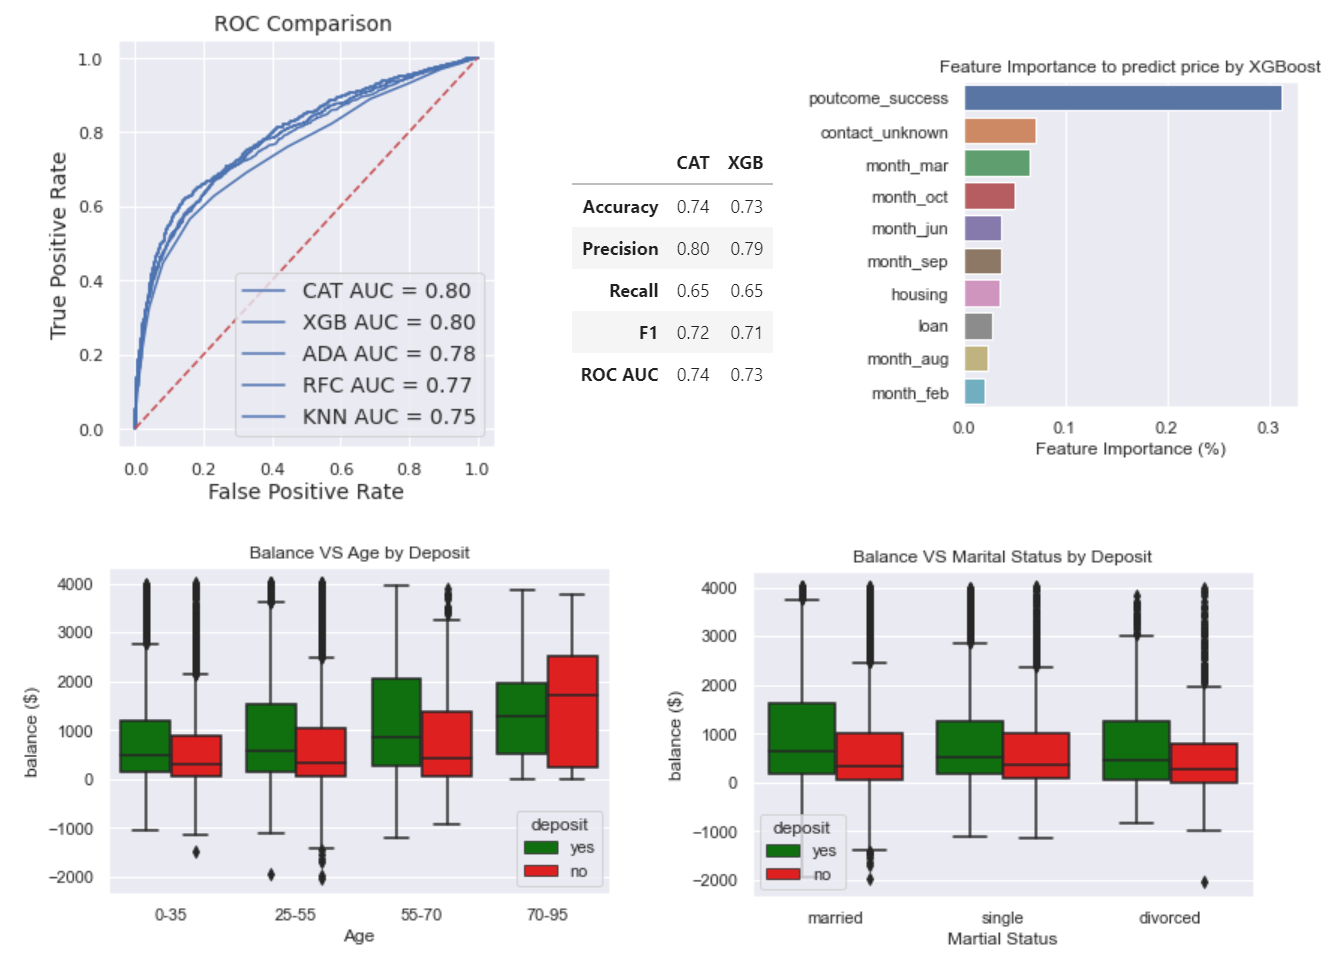

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, auc, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from catboost import CatBoostClassifier


seed=42

sns.set(style='darkgrid')

In [77]:
df1=pd.read_csv('/kaggle/input/bank-marketing-dataset/bank.csv')

Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric)<br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - default: has credit in default? (categorical: 'no','yes','unknown')<br>
6 - balance: bank balance <br>
7 - housing: has housing loan? (categorical: 'no','yes','unknown')<br>
8 - loan: has personal loan? (categorical: 'no','yes','unknown')<br>
#### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: 'cellular','telephone')<br>
10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
#### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>

Output variable (desired target):<br>
17 - deposit - has the client subscribed a term deposit? (binary: 'yes','no')<br>



In [78]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


We will first create a copy called 'df' of the original 'df1' dataset.

In [79]:
df=df1.copy()

In [80]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There no missing values and there are a lot of categorical features in the data. They will be analyzed first and then encoded before the ML training.

In [82]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Some first insights on the data:<br>
**Age:<br>**
the medium age is 41 years old.
the minimum age is 18 years old.
the maximum age is 95 years old.
<br>
**Balance:<br>**
The std deviation looks high (3225) compared to the mean (1528).<br>
<br>
Housing and deposit look balanced as their mean value is close to 0.5
<br>
From the column 'previous' we can see that most of the clients have been already contacted, since the value is close to 1 (0.8325)

As written in the dataset description, the duration column should be dropped since it includes an information which cannot be known before the call to the client.

In [83]:
df=df.drop('duration', axis=1)

# Data Cleaning and Feature Engineering

In [84]:
df_clean = df.copy()

In [85]:
df_clean.describe()

,age,balance,day,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,63.000000,854.000000,58.000000


We should transform day into a categorical feature.

In [86]:
df_clean['day'] = df_clean['day'].astype(object)

In [87]:
df_clean.describe()

,age,balance,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,2.508421,51.330407,0.832557
std,11.913369,3225.413326,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,63.000000,854.000000,58.000000


<AxesSubplot:>

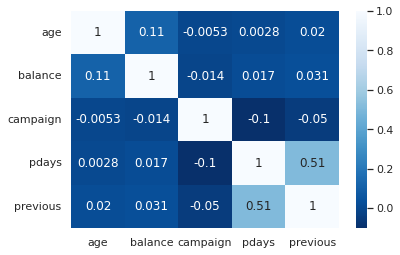

In [88]:
sns.heatmap(df_clean.corr(), cmap='Blues_r', annot=True)

## Age analysis

<AxesSubplot:xlabel='age'>

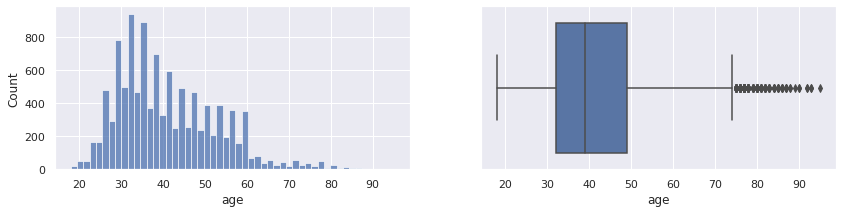

In [89]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='age', data=df_clean)
sns.boxplot(ax=ax[1], x='age', data=df_clean)

In order to remove outliers from this skewed distribution, we will define a function to get the upper and lower limits based on the IQR

In [90]:
def get_upper_lower(data):
    percentile25 = data.quantile(0.25)
    percentile75 = data.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return upper_limit, lower_limit

In [91]:
upper_limit, lower_limit = get_upper_lower(df_clean['age'])
print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

upper_limit:  74.5
lower_limit:  6.5


In [92]:
len(df_clean)

11162

In [93]:
df_clean = df_clean[(df_clean['age'] > lower_limit ) & (df_clean['age'] < upper_limit)]

<AxesSubplot:xlabel='age'>

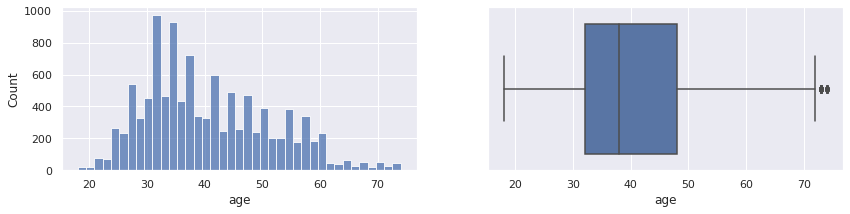

In [94]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='age', data=df_clean)
sns.boxplot(ax=ax[1], x='age', data=df_clean)

In [95]:
print('We removed {} outliers!'.format(len(df)-len(df_clean)))

We removed 171 outliers!


## balance

<AxesSubplot:xlabel='balance'>

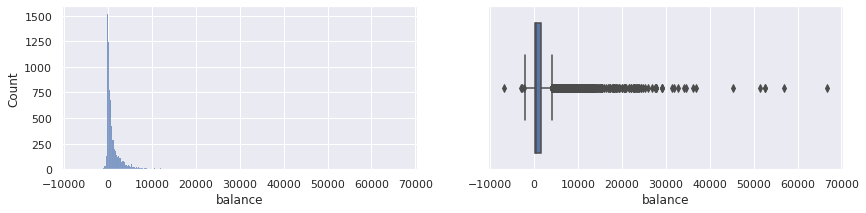

In [96]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='balance', data=df_clean)
sns.boxplot(ax=ax[1], x='balance', data=df_clean)

In [97]:
upper_limit, lower_limit = get_upper_lower(df_clean['balance'])
print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

upper_limit:  4030.25
lower_limit:  -2227.75


<AxesSubplot:xlabel='balance'>

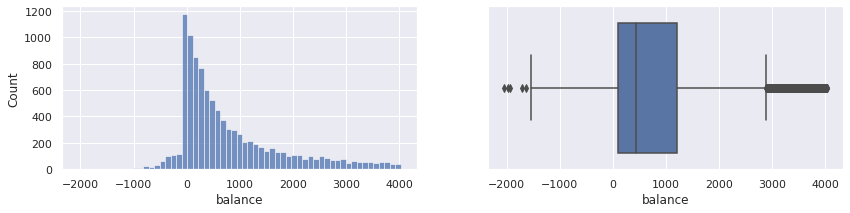

In [98]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='balance', data=df_clean[ (df_clean['balance'] > lower_limit ) & (df_clean['balance'] < upper_limit )])
sns.boxplot(ax=ax[1], x='balance', data=df_clean[ (df_clean['balance'] > lower_limit ) & (df_clean['balance'] < upper_limit )])

In [99]:
df_clean = df_clean[ (df_clean['balance'] > lower_limit) & (df_clean['balance'] < upper_limit)]

<AxesSubplot:xlabel='balance'>

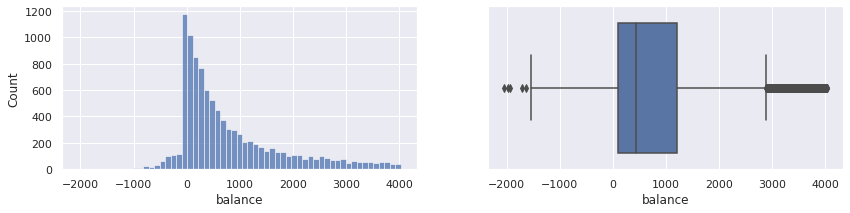

In [100]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='balance', data=df_clean)
sns.boxplot(ax=ax[1], x='balance', data=df_clean)

In [101]:
print('We removed {} outliers!'.format(len(df)-len(df_clean)))

We removed 1208 outliers!


## campaign

<AxesSubplot:xlabel='campaign'>

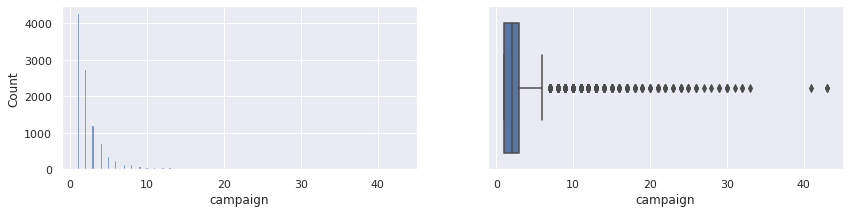

In [102]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='campaign', data=df_clean)
sns.boxplot(ax=ax[1], x='campaign', data=df_clean)

In [103]:
upper_limit, lower_limit = get_upper_lower(df_clean['campaign'])
print('upper_limit: ', upper_limit)
print('lower_limit: ', lower_limit)

upper_limit:  6.0
lower_limit:  -2.0


In [104]:
#df_clean = df_clean[ (df_clean['campaign'] > lower_limit ) & (df_clean['campaign'] < upper_limit )]

In [105]:
df_clean = df_clean[df_clean['campaign'] <= 40]

<AxesSubplot:xlabel='campaign'>

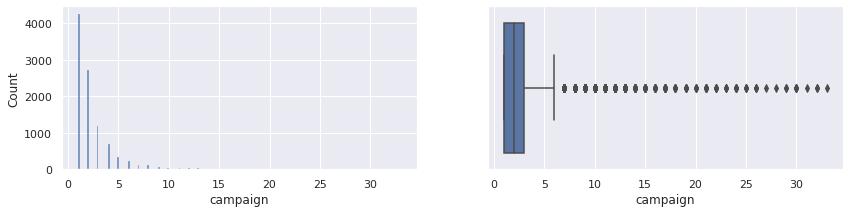

In [106]:
fig, ax = plt.subplots(1,2, figsize=(14,3))
sns.histplot(ax=ax[0], x='campaign', data=df_clean)
sns.boxplot(ax=ax[1], x='campaign', data=df_clean)

In [107]:
print('We removed {} outliers!'.format(len(df)-len(df_clean)))

We removed 1211 outliers!


## pdays

<AxesSubplot:xlabel='pdays'>

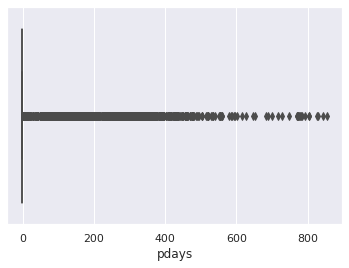

In [108]:
sns.boxplot(x='pdays', data=df_clean)

In [109]:
df_clean['pdays'].value_counts()

-1      7473
 92       85
 182      75
 91       72
 181      69
        ... 
 470       1
 476       1
 437       1
 728       1
 701       1
Name: pdays, Length: 457, dtype: int64

In [110]:
df_clean['prev_cont'] = df_clean['pdays'] ==-1
df_clean['prev_cont'] = df_clean['prev_cont'].replace([True,False],[1,0])

In [111]:
df_clean['pdays'] = df_clean['pdays'].replace(-1, 0)

In [112]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,prev_cont
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,0,unknown,yes,1


<AxesSubplot:xlabel='prev_cont', ylabel='count'>

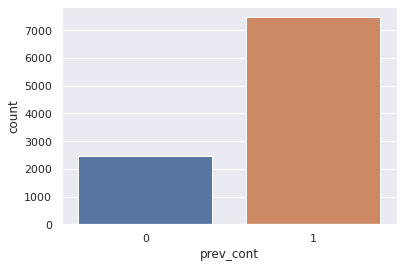

In [113]:
sns.countplot(x='prev_cont', data=df_clean)

# Exploratory Data Analysis

In [114]:
df=df_clean

To allow a better visualization, different palette will be chosen for the following plots.

In [115]:
palette = {'yes':'green', 'no':'red'}

### We will first analyze the relationship between the categorical features and the target variable, which is 'deposit'

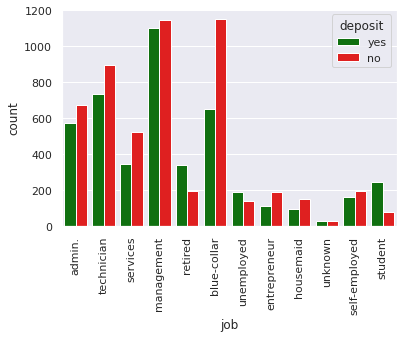

In [116]:
sns.countplot(x= 'job', hue = 'deposit', data=df, palette=palette)
plt.xticks(rotation=90);

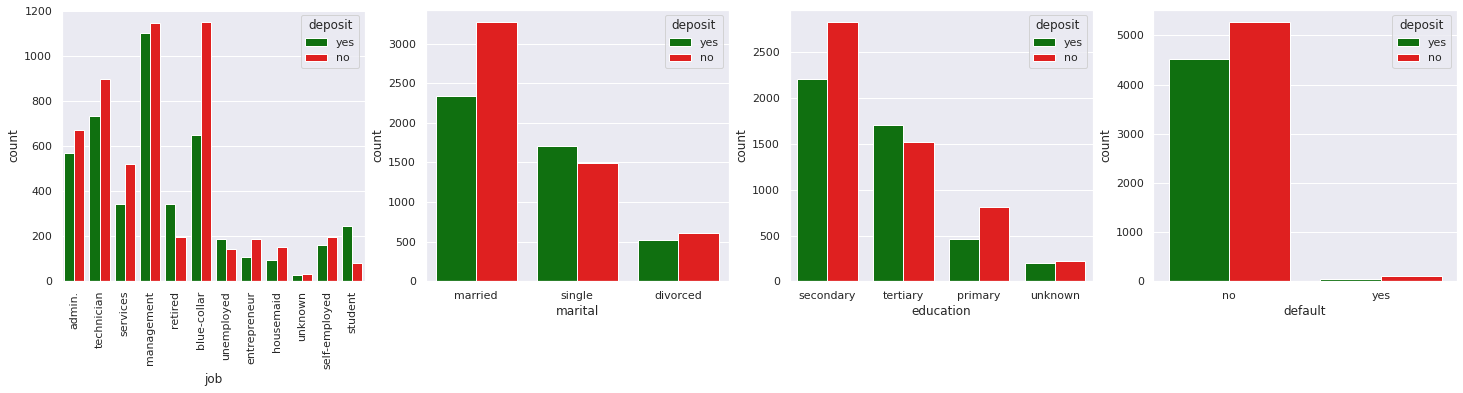

In [117]:
fig, axs =plt.subplots(1,4,figsize=(25, 5));
sns.countplot(x= 'job', hue = 'deposit', data=df, ax=axs[0], palette=palette);
sns.countplot(x= 'marital', hue = 'deposit', data=df, ax=axs[1], palette=palette);
sns.countplot(x= 'education', hue = 'deposit', data=df, ax=axs[2], palette=palette);
sns.countplot(x= 'default', hue = 'deposit', data=df, ax=axs[3], palette=palette);
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90);

From this plot we can say:<br>
**Job:**
*   The majority of retired clients or students accepted the deposit
*   The majority of blue collars refused the deposit

**Marital status:**

*   Most of married clients refused the deposit
*   Single clients tended to accept the deposit

**Education:**

*   Clients with a lower education (secondary and primary) tended to refuse the deposit
*   Clients with higher education ('tertiary') tended to accept the offer





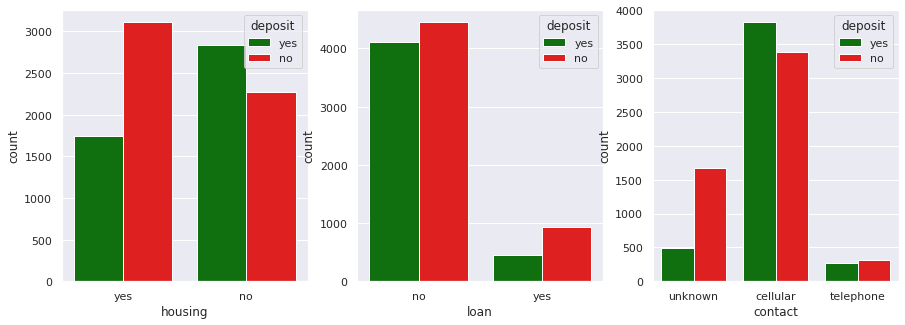

In [118]:
fig, axs =plt.subplots(1,3,figsize=(15, 5));
sns.countplot(x= 'housing', hue = 'deposit', data=df, ax=axs[0], palette=palette);
sns.countplot(x= 'loan', hue = 'deposit', data=df, ax=axs[1], palette=palette);
sns.countplot(x= 'contact', hue = 'deposit', data=df, ax=axs[2], palette=palette);

From this plot we can say:<br>
**Housing (Loan) and (Personal) Loan:**
*   Clients without a housing loan tended to accept the deposit compared to clients with a loan

**(Personal) Loan:**

*   Most of the clients which had a personal loan refused the deposit

**Contact:**

*   Clients with a cellular phone tended to accept the deposit.

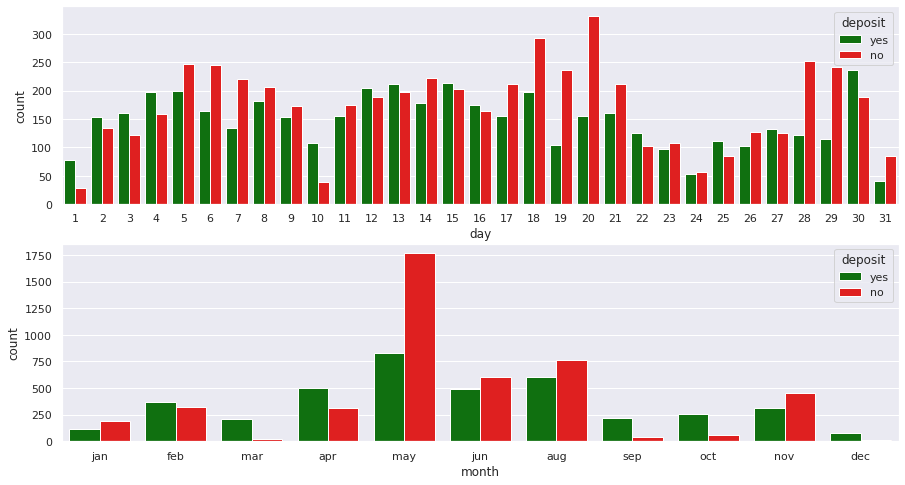

In [119]:
fig, axs =plt.subplots(2,1,figsize=(15, 8));
sns.countplot(x= 'day', hue = 'deposit', data=df, ax=axs[0], palette=palette);
sns.countplot(x= 'month', hue = 'deposit', data=df, ax=axs[1], order=['jan','feb','mar','apr','may','jun','aug','sep','oct','nov','dec'], palette=palette);

There is not a clear pattern when analyzing the deposit acceptance by day. <br>
However, for what concerna the month plot:

*   The majority of data regards the month of 'may'.
*   In the months of February, March, April, September, October and December most of the clients accepted the deposit.


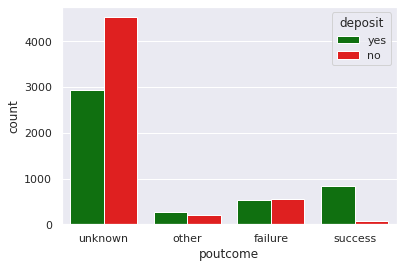

In [120]:
plt.figsize=(10, 10);
sns.countplot(x= 'poutcome', hue = 'deposit', data=df, palette=palette);

We can see that people who previously accepted the deposit tended to accept the new offers.

## General insights from the data

Relationship between age and education:

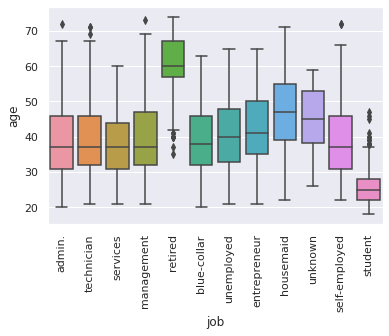

In [121]:
ax = sns.boxplot(x='job', y='age', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

As expected we can see that retired clients tends to be older.

### Relationship between balance and age:

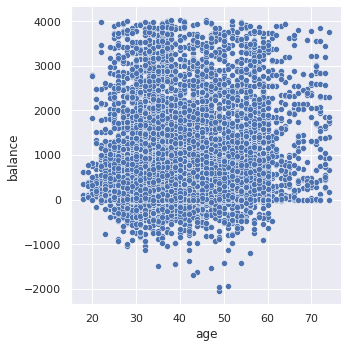

In [122]:
ax = sns.relplot(x='age', y='balance', data=df)

This plot looks messy, we will create a categorical column for 'age'.

In [123]:
df['age_cate'] = pd.cut(df['age'], bins=[0, 35, 55, 70, float('Inf')], labels=['0-35', '25-55', '55-70', '70-95'])

Text(0.5, 1.0, 'Balance VS Age by Deposit')

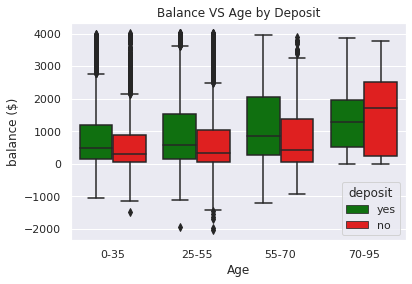

In [124]:
sns.boxplot(x='age_cate', y='balance', hue='deposit', data=df, palette=palette)
plt.ylabel('balance ($)')
plt.xlabel('Age')
plt.title('Balance VS Age by Deposit')

From this plot we can see that older customers tends to have a higher bank balance and that customers who accepted the deposit tended to have a higher balance compared to the customers who refused the deposit.

Text(0.5, 1.0, 'Balance VS Marital Status by Deposit')

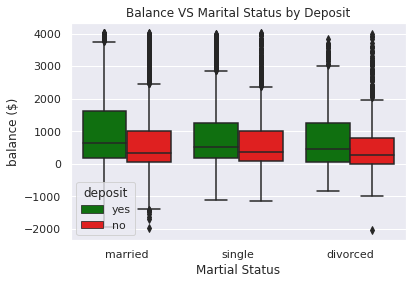

In [125]:
sns.boxplot(x='marital', y='balance', hue='deposit', data=df, palette=palette)
plt.ylabel('balance ($)')
plt.xlabel('Martial Status')
plt.title('Balance VS Marital Status by Deposit')

From this plot we can see that the distribution of divorced clients has a quite large IQR compared to married and single clients. This means that divorced clients have on average lower bank balance and have a quite high variance.

In [126]:
df=df.drop('age_cate', axis=1)

# Data Preparation for ML algorithms

In [127]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,prev_cont
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,0,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,0,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,0,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,0,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,0,0,unknown,yes,1


In [128]:
df = df.replace(['yes','no'], [1,0])

In [129]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit,prev_cont
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1,0,0,unknown,1,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1,0,0,unknown,1,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1,0,0,unknown,1,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,1,0,0,unknown,1,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,2,0,0,unknown,1,1


<AxesSubplot:>

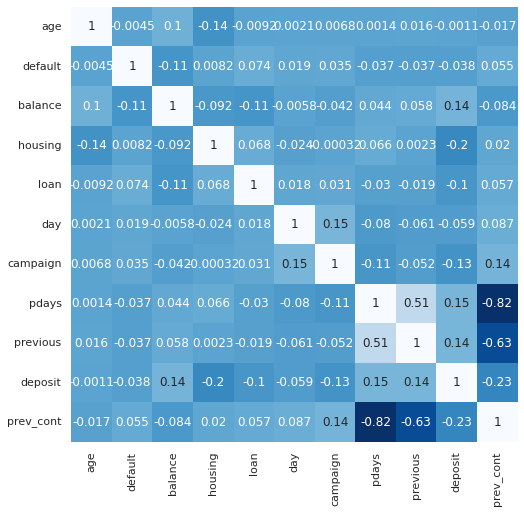

In [130]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True, cbar=False)

We need to check if the dataset is balanced with respect to the target feature (deposit)

In [131]:
df.deposit.value_counts()

0    5377
1    4574
Name: deposit, dtype: int64

The dataset looks somewhat balanced. We can resample the dataset in order to have the same number of rows with yes and no in "deposit" to further improve the performance of the ML algorithm.

Moreover, before creating the ML model, we need to prepare the data such as encode categorical features etc...

In [132]:
cat_feat = df.select_dtypes(include="object").columns

In [133]:
cat_feat

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

These categorical featurs will be encoded by one hot encoding.

In [134]:
encoded_df = pd.get_dummies(df, drop_first=True)

In [135]:
X = encoded_df.drop('deposit', axis=1)
y = encoded_df['deposit']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [137]:
scaler = StandardScaler()

In [138]:
scaler.fit(X_train)

StandardScaler()

In [139]:
X_train = scaler.transform(X_train)          
X_test = scaler.transform(X_test)          

In [140]:
def get_scores(y, y_pred):
    data={'Accuracy': np.round(accuracy_score(y, y_pred),2),
    'Precision':np.round(precision_score(y, y_pred),2),
    'Recall':np.round(recall_score(y, y_pred),2),
    'F1':np.round(f1_score(y, y_pred),2),
    'ROC AUC':np.round(roc_auc_score(y, y_pred),2)}
    scores_df = pd.Series(data).to_frame('scores')
    return scores_df

In [141]:
def conf_matrix(y, y_pred):
    fig, ax =plt.subplots(figsize=(3,3))
    labels=['No','Yes']
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False)
    plt.title('Accept Deposit?')
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);


## KNN

In [142]:
knn_model = KNeighborsClassifier(n_neighbors=20)

In [143]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [144]:
y_pred_knn = knn_model.predict(X_test)

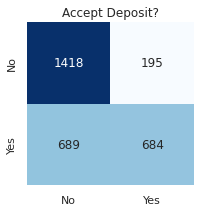

In [145]:
conf_matrix(y_test,y_pred_knn)

In [146]:
scores_knn = get_scores(y_test,y_pred_knn)
scores_knn

,scores
Accuracy,0.70
Precision,0.78
Recall,0.50
F1,0.61
ROC AUC,0.69


# Can balancing improve model bias?

In [147]:
#create two dataframes where deposit is yes or no
yes_deposit= df[df['deposit']==1]
no_deposit = df[df['deposit']==0]

no_deposit = no_deposit.sample(n=len(yes_deposit), random_state=seed)

df_bal = pd.concat([yes_deposit,no_deposit], join="inner")

In [148]:
df_bal.deposit.value_counts()

1    4574
0    4574
Name: deposit, dtype: int64

In [149]:
enc_bal_df = pd.get_dummies(df_bal, drop_first=True)

In [150]:
X = enc_bal_df.drop('deposit', axis=1)
y = enc_bal_df['deposit']

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=seed)

In [152]:
scaler = StandardScaler()

In [153]:
scaler.fit(X_train)

StandardScaler()

In [154]:
X_train = scaler.transform(X_train)          
X_test = scaler.transform(X_test)          

# KNN

In [155]:
knn_model= KNeighborsClassifier(n_neighbors=20)

In [156]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [157]:
y_pred_knn = knn_model.predict(X_test)

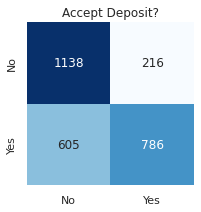

In [158]:
conf_matrix(y_test, y_pred_knn)


In [159]:
get_scores(y_test,y_pred_knn)

,scores
Accuracy,0.70
Precision,0.78
Recall,0.57
F1,0.66
ROC AUC,0.70


By balancing the dataset we we get better results of these scores. We will use the balanced dataset to train the following ML algorithms as well.

# AdaBoostClassifier

In [160]:
from sklearn.svm import SVC
abc = AdaBoostClassifier(n_estimators=800, learning_rate=0.1, random_state=seed)


In [161]:
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=800, random_state=42)

In [162]:
y_pred_abc = abc.predict(X_test)

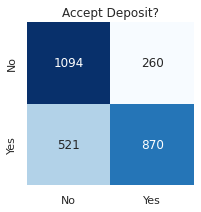

In [163]:
conf_matrix(y_test, y_pred_abc)

In [164]:
get_scores(y_test, y_pred_abc)

,scores
Accuracy,0.72
Precision,0.77
Recall,0.63
F1,0.69
ROC AUC,0.72


# Random forest

In [165]:
rfc_model = RandomForestClassifier(n_estimators=1000, max_depth=100, max_features=20)

In [166]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_features=20, n_estimators=1000)

In [167]:
y_pred_rfc = rfc_model.predict(X_test)

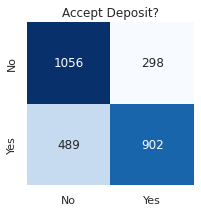

In [168]:
conf_matrix(y_test, y_pred_rfc)

In [169]:
get_scores(y_test, y_pred_rfc)

,scores
Accuracy,0.71
Precision,0.75
Recall,0.65
F1,0.70
ROC AUC,0.71


# XGBoost

In [170]:
xgb_model = xgb.XGBClassifier(n_estimators=3000, max_depth=4, learning_rate=0.01)

In [171]:
xgb_model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:21:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [172]:
y_pred_xgb = xgb_model.predict(X_test)

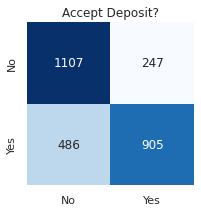

In [173]:
conf_matrix(y_test, y_pred_xgb)

In [174]:
get_scores(y_test, y_pred_rfc)

,scores
Accuracy,0.71
Precision,0.75
Recall,0.65
F1,0.70
ROC AUC,0.71


# CATBoost

In [175]:
cat_model = CatBoostClassifier(iterations=1000)
cat_model.fit(X_train, y_train)

Learning rate set to 0.022765
0:	learn: 0.6885779	total: 63.2ms	remaining: 1m 3s
1:	learn: 0.6851386	total: 65.9ms	remaining: 32.9s
2:	learn: 0.6810692	total: 69.8ms	remaining: 23.2s
3:	learn: 0.6769285	total: 73.4ms	remaining: 18.3s
4:	learn: 0.6731655	total: 77.2ms	remaining: 15.4s
5:	learn: 0.6692250	total: 80.9ms	remaining: 13.4s
6:	learn: 0.6654678	total: 84.8ms	remaining: 12s
7:	learn: 0.6622163	total: 88.5ms	remaining: 11s
8:	learn: 0.6588864	total: 92.2ms	remaining: 10.2s
9:	learn: 0.6556655	total: 96.1ms	remaining: 9.51s
10:	learn: 0.6527314	total: 99.9ms	remaining: 8.98s
11:	learn: 0.6498303	total: 104ms	remaining: 8.53s
12:	learn: 0.6473115	total: 107ms	remaining: 8.15s
13:	learn: 0.6444702	total: 111ms	remaining: 7.82s
14:	learn: 0.6422535	total: 115ms	remaining: 7.54s
15:	learn: 0.6397554	total: 119ms	remaining: 7.3s
16:	learn: 0.6374562	total: 123ms	remaining: 7.09s
17:	learn: 0.6352203	total: 126ms	remaining: 6.89s
18:	learn: 0.6329197	total: 130ms	remaining: 6.71s
19:	l

In [176]:
y_pred_cat = cat_model.predict(X_test)

,scores
Accuracy,0.74
Precision,0.80
Recall,0.65
F1,0.72
ROC AUC,0.74


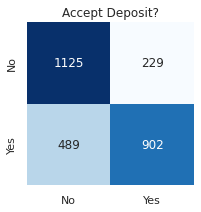

In [177]:
conf_matrix(y_test, y_pred_cat)
get_scores(y_test, y_pred_cat)

# Results comparison

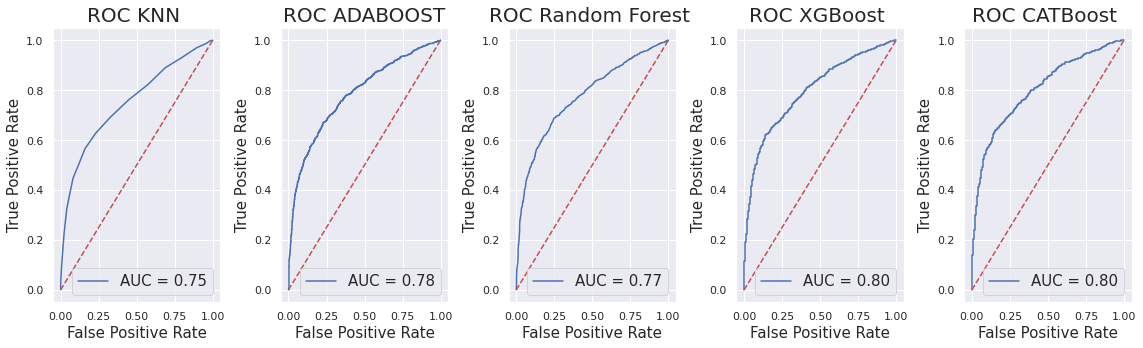

In [178]:
fig, ax_arr = plt.subplots(1,5, figsize = (16, 5))

#KNN
probs = knn_model.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = roc_curve(y_test, preds)
roc_aucknn = auc(fprknn, tprknn)

ax_arr[0].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0].plot([0, 1], [0, 1],'r--')
ax_arr[0].set_title('ROC KNN ',fontsize=20)
ax_arr[0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0].legend(loc = 'lower right', prop={'size': 15})

#ADABOOST
probs = abc.predict_proba(X_test)
preds = probs[:,1]
fprada, tprada, thresholdlog = roc_curve(y_test,preds)
roc_aucada = auc(fprada, tprada)

ax_arr[1].plot(fprada, tprada, 'b', label = 'AUC = %0.2f' % roc_aucada)
ax_arr[1].plot([0, 1], [0, 1],'r--')
ax_arr[1].set_title('ROC ADABOOST',fontsize=20)
ax_arr[1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1].legend(loc = 'lower right', prop={'size': 15})

#RANDOM FOREST 
probs = rfc_model.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = roc_curve(y_test, preds)
roc_aucrfc = auc(fprrfc, tprrfc)

ax_arr[2].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[2].plot([0, 1], [0, 1],'r--')
ax_arr[2].set_title('ROC Random Forest ',fontsize=20)
ax_arr[2].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2].legend(loc = 'lower right', prop={'size': 15})

#XGBOOST 
probs = xgb_model.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholddxgb = roc_curve(y_test, preds)
roc_aucxgb = auc(fprxgb, tprxgb)

ax_arr[3].plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax_arr[3].plot([0, 1], [0, 1],'r--')
ax_arr[3].set_title('ROC XGBoost ',fontsize=20)
ax_arr[3].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[3].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[3].legend(loc = 'lower right', prop={'size': 15})

#CATBOOST
probs = cat_model.predict_proba(X_test)
preds = probs[:,1]
fprcat, tprcat, thresholddxgb = roc_curve(y_test, preds)
roc_auccat = auc(fprcat, tprcat)

ax_arr[4].plot(fprcat, tprcat, 'b', label = 'AUC = %0.2f' % roc_auccat)
ax_arr[4].plot([0, 1], [0, 1],'r--')
ax_arr[4].set_title('ROC CATBoost ',fontsize=20)
ax_arr[4].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[4].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[4].legend(loc = 'lower right', prop={'size': 15})


#plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

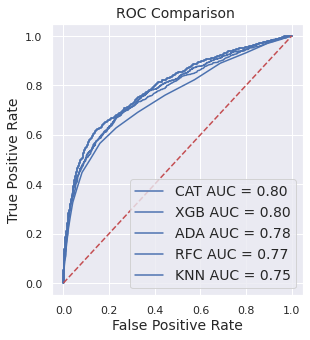

In [179]:
#ALL PLOTS ----------------------------------
fig = plt.figure(figsize=(4.5,5))
plt.plot(fprxgb, tprxgb, 'b', label='CAT AUC = %0.2f' % roc_auccat)
plt.plot(fprxgb, tprxgb, 'b', label='XGB AUC = %0.2f' % roc_aucxgb)
plt.plot(fprada, tprada, 'b', label = 'ADA AUC = %0.2f' % roc_aucada)
plt.plot(fprrfc, tprrfc, 'b', label = 'RFC AUC = %0.2f' % roc_aucrfc)
plt.plot(fprknn, tprknn, 'b',  label = 'KNN AUC = %0.2f' % roc_aucknn)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Comparison ',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.xlabel('False Positive Rate',fontsize=14)
plt.legend(loc = 'lower right', prop={'size': 14})

## CATBoost vs XGBoost performance:

In [180]:
cat_scores = get_scores(y_test, y_pred_cat).rename({'scores':'CAT'}, axis=1)
xgb_scores = get_scores(y_test, y_pred_xgb).rename({'scores':'XGB'}, axis=1)


In [181]:
cat_xgb = pd.concat([cat_scores, xgb_scores], axis=1)

In [182]:
cat_xgb

,CAT,XGB
Accuracy,0.74,0.73
Precision,0.80,0.79
Recall,0.65,0.65
F1,0.72,0.71
ROC AUC,0.74,0.73


# Feature Importance

In [183]:
xgb_model.feature_names = enc_bal_df.drop('deposit', axis = 1).columns

In [184]:
feat_df= pd.DataFrame({'feature': xgb_model.feature_names,'importance':xgb_model.feature_importances_})

In [185]:
sorted_df=feat_df.sort_values('importance', ascending=False)

Text(0, 0.5, '')

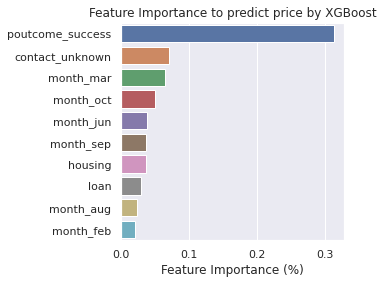

In [186]:
plt.figure(figsize=(4,4))
sns.barplot(x='importance', y='feature', data=sorted_df.head(10))
plt.title('Feature Importance to predict price by XGBoost')
plt.xlabel('Feature Importance (%)')
plt.ylabel('')

As we can see from this plot, the most important features to determine if a new customer will accept the deposit are:<br>
**poutcome success**<br>
Customers who previously accpeted the deposit, tended to accept new deposits.<br>

**Month**<br>
7 out of 10 of the most important features are months. This means that the company should focus on these specific months to ask new customers the deposit.